In [17]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


data = pd.read_csv("Hotel_Reviews.csv")
data.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ercak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ercak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ercak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


In [18]:
# Check for null values
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [19]:
# Changing format of Review_Date
data['Review_Date'] = pd.to_datetime(data['Review_Date'])

In [20]:
# Checking types of data
data.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
lat                                                  float64
lng                     

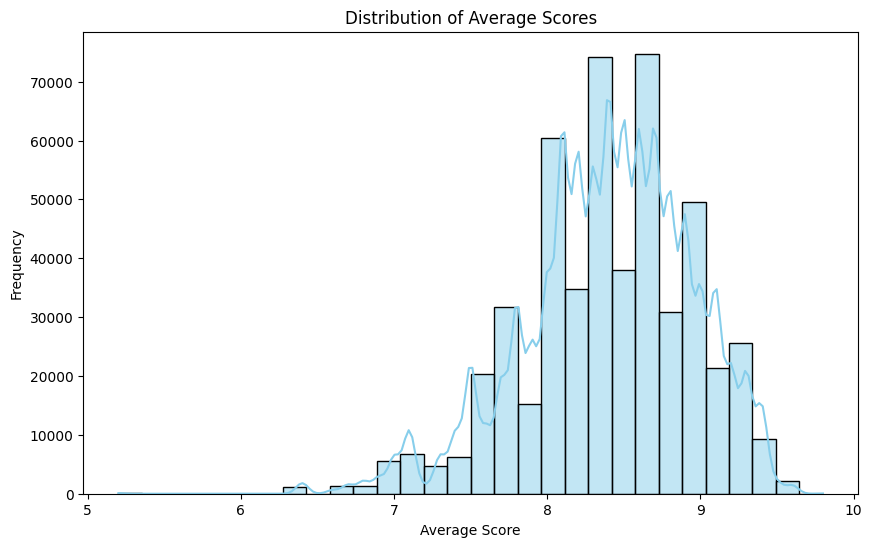

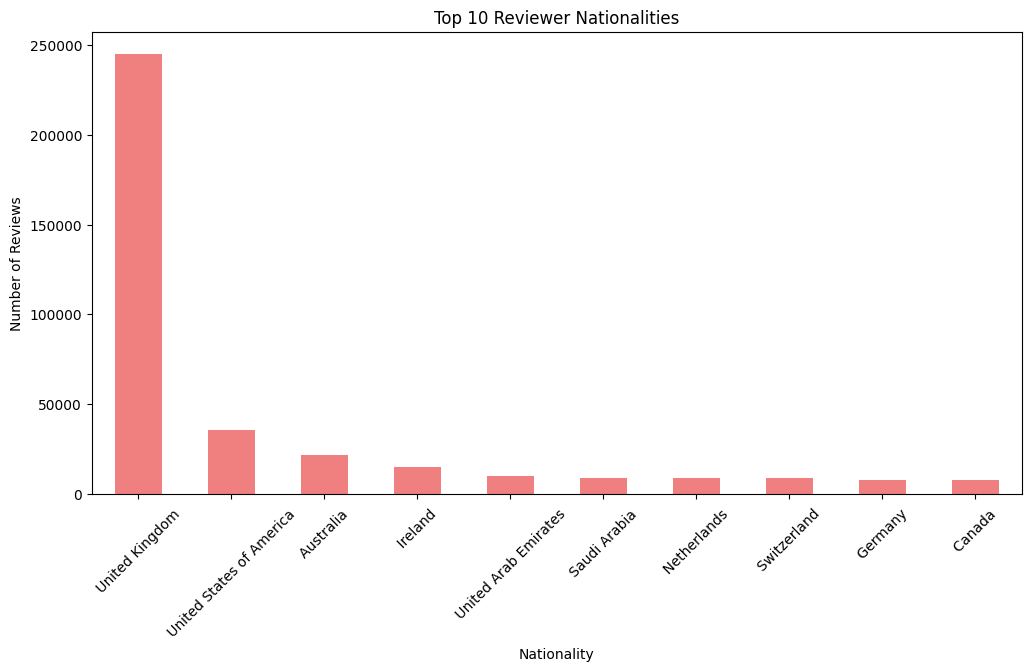

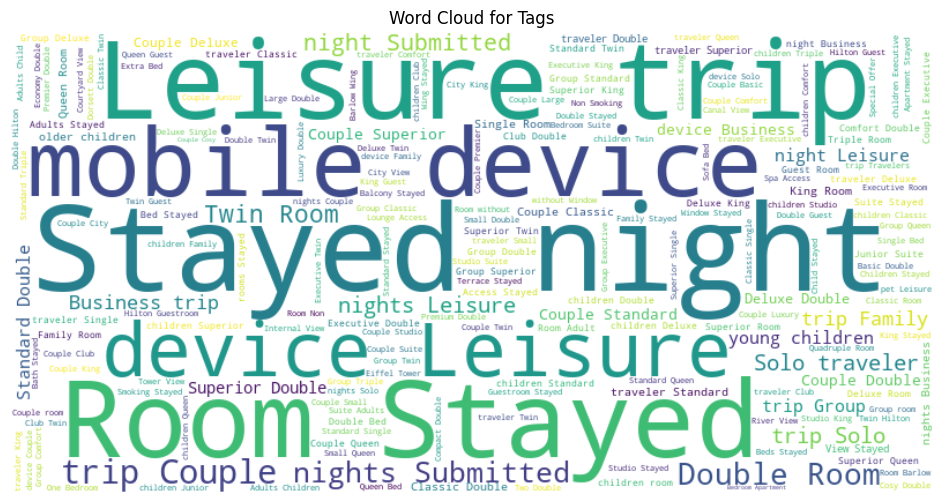

In [21]:
# Exploratory Data Analysis (EDA)

# Distribution of Average Scores
# Visualizes the distribution of average scores in the dataset.
plt.figure(figsize=(10, 6))
sns.histplot(data['Average_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

# Top 10 Reviewer Nationalities:
# Displays a bar chart showing the top 10 reviewer nationalities.
top_nationalities = data['Reviewer_Nationality'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_nationalities.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Reviewer Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Tags:
# Generates a word cloud based on hotel review tags.
tags_text = ' '.join(data['Tags'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tags')
plt.show()





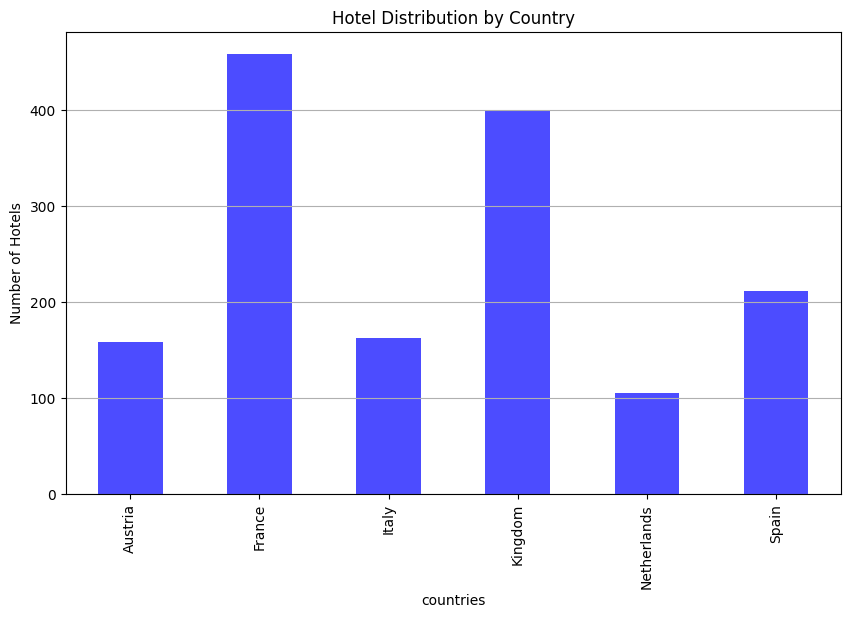

In [22]:
# Now I will split the address and pick the last word in the address to identify the country
data['countries'] = data['Hotel_Address'].apply(lambda address: address.split()[-1])

# Counting hotels by location
city_counts = data.groupby('countries')['Hotel_Name'].nunique()


# Hotel Distribution by Country:
# Visualizes the distribution of hotels by country.
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Hotel Distribution by Country')
plt.xlabel('countries')
plt.ylabel('Number of Hotels')
plt.grid(axis='y')
plt.show()

In [23]:
# Data Cleaning and Preprocessing

# Replacing "United Kingdom with "UK"
data.Hotel_Address = data.Hotel_Address.str.replace("Kingdom", "UK")


# Deleting unnecessary columns
data.drop(['Additional_Number_of_Scoring',
           'Review_Date',
           'Reviewer_Nationality',
           'Negative_Review',
           'Review_Total_Negative_Word_Counts',
           'Total_Number_of_Reviews',
           'Positive_Review',
           'Review_Total_Positive_Word_Counts',
           'Total_Number_of_Reviews_Reviewer_Has_Given',
           'Reviewer_Score',
           'days_since_review',
           'lat',
           'lng'], axis=1, inplace=True)


# Data Cleaning and Imputation
# Making sure that data are strings and not a list
def impute(column):
    column = column[0]
    if (type(column) != list):
        return "".join(literal_eval(column))
    else:
        return column

data["Tags"] = data[["Tags"]].apply(impute, axis=1)



data['countries'] = data['countries'].str.lower()
data['Tags'] = data['Tags'].str.lower()

C:\Users\ercak\AppData\Local\Temp\ipykernel_28064\3416280954.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  column = column[0]


In [24]:
# This is how it looks my data
data.head(10)

,Hotel_Address,Average_Score,Hotel_Name,Tags,countries
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip family with young children dup...,netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip solo traveler duplex double ro...,netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple suite stayed 2 nights ...,netherlands
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip group duplex double room stay...,netherlands
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip group duplex twin room stayed...,netherlands
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple large king room stayed...,netherlands


In [25]:
# Text Preprocessing for Hotel Recommendation
# Defines a function recommend_hotel that takes a location and a user description, 
# tokenizes and lemmatizes the text, and recommends hotels based on similarity in tags.

def recommend_hotel(location, description):

    # Converts the description to lowercase. This is done to ensure case-insensitivity during further processing.
    description = description.lower()

    # It tokenizes the description into a list of words. However, the result is not assigned to any variable, so this line doesn't have a visible effect.
    word_tokenize(description)

    # Removes English stop words (common words like "and", "the", etc.).
    # Lemmatizes each word to its base form (e.g., "running" becomes "run").
    # Creates a set filtered_set containing unique lemmatized words.
    stop_words = stopwords.words('english')
    lemm = WordNetLemmatizer()
    filtered  = {word for word in description if not word in stop_words}
    filtered_set = set()
    for fs in filtered:
        filtered_set.add(lemm.lemmatize(fs))

    # Filters rows from the DataFrame data where the 'countries' column matches the specified location.
    country = data[data['countries']==location.lower()]

    # Sets a new index for the filtered country DataFrame.
    country = country.set_index(np.arange(country.shape[0]))


    # Tokenizes the "Tags" column of each row in the filtered country DataFrame.
    # Removes stop words and lemmatizes the tokenized words.
    # Calculates the intersection of lemmatized words between the current row's "Tags" and the filtered_set.
    # Appends the length of the intersection to the cos list.
    list1 = []; list2 = []; cos = [];
    for i in range(country.shape[0]):
        temp_token = word_tokenize(country["Tags"][i])
        temp_set = [word for word in temp_token if not word in stop_words]
        temp2_set = set()
        for s in temp_set:
            temp2_set.add(lemm.lemmatize(s))
        vector = temp2_set.intersection(filtered_set)
        cos.append(len(vector))


    # Adds a new column 'similarity' to the country DataFrame based on the cosine similarity calculated earlier. 
    # Then, the DataFrame is sorted in descending order based on the 'similarity' column.
    country['similarity']=cos
    country = country.sort_values(by='similarity', ascending=False)

    # Drops duplicate rows based on the 'Hotel_Name' column, keeping the first occurrence.
    # Sorts the DataFrame based on the 'Average_Score' column in descending order.
    country.drop_duplicates(subset='Hotel_Name', keep='first', inplace=True)
    country.sort_values('Average_Score', ascending=False, inplace=True)

    # Resets the index of the DataFrame.
    country.reset_index(inplace=True)

    # Returns the top recommendations by selecting specific columns ("Hotel_Name", "Average_Score", "Hotel_Address") and using the head() function to get the top rows.
    return country[["Hotel_Name", "Average_Score", "Hotel_Address"]].head()



# Usage Example
recommend_hotel('France', 'I am going with my girlfriend and dog for holiday')



,Hotel_Name,Average_Score,Hotel_Address
0,Ritz Paris,9.8,15 Place Vend me 1st arr 75001 Paris France
1,H tel de La Tamise Esprit de France,9.6,4 rue d Alger 1st arr 75001 Paris France
2,Le Narcisse Blanc Spa,9.5,19 Boulevard De La Tour Maubourg 7th arr 75007...
3,Hotel The Peninsula Paris,9.5,19 avenue Kleber 16th arr 75116 Paris France
4,Hotel Monge,9.4,55 rue Monge 5th arr 75005 Paris France


In [26]:
# Conclusion
# In conclusion, this Python script serves as a comprehensive tool for exploring and deriving insights from a hotel review dataset. The script seamlessly integrates data analysis, visualization, 
# and a hotel recommendation system, providing a holistic approach to understanding and leveraging the data.

# The exploratory data analysis (EDA) section illuminates various aspects of the dataset, from the distribution of average scores to the top reviewer nationalities and a visually appealing word 
# cloud generated from review tags. These visualizations offer valuable insights into the patterns and characteristics of the hotel reviews.

# Data cleaning and preprocessing steps ensure that the dataset is in a suitable format for analysis. Unnecessary columns are removed, and the 'Tags' column is appropriately imputed, 
# contributing to the overall cleanliness and quality of the dataset.

# The text preprocessing section introduces a recommendation function (recommend_hotel) that takes a location and user description as input, tokenizes and lemmatizes the text, and 
# recommends hotels based on the similarity of tags. This function demonstrates the application of natural language processing techniques for personalized hotel suggestions.

# The script concludes with a usage example, showcasing how the recommendation function can be utilized with specific user inputs. This example 
# illustrates the practical application of the script in real-world scenarios.

# In summary, the Hotel Recommendation System script not only provides a deep understanding of the dataset through exploratory analysis but also offers a 
# functional recommendation tool for users seeking personalized hotel suggestions. The modular and well-documented nature of the code makes it adaptable and 
# extendable for future enhancements and applications in the domain of hotel recommendation systems.